## 1. Data Preparation:

Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

In [2]:
import pandas as pd
data = pd.read_excel(r"D:\Decision Tree\heart_disease.xlsx",sheet_name = 'Heart_disease') 
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [3]:
data['num'].value_counts()

0    399
1    265
2    109
3    107
4     28
Name: num, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [6]:
data['exang'] = data['exang'].astype(bool)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    bool   
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(2), float64(1), int64(5), object(5)
memory usage: 79.9+ KB


## 2. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, and inconsistencies in the data.
Visualize the distribution of features, including histograms, box plots, and correlation matrices.

In [8]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,True,NaN,downsloping,fixed defect,4


In [9]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [10]:
((data['oldpeak'].isnull().sum()) / (len(data)))*100

6.828193832599119

## 6% data will be missed in oldpeak

In [11]:
print('mean:',data['oldpeak'].mean())
print('median : ',data['oldpeak'].median())
print('mode:',data['oldpeak'].mode())

mean: 0.8912529550827422
median :  0.5
mode: 0    0.0
Name: oldpeak, dtype: float64


In [12]:
print(data['oldpeak'].min())
print(data['oldpeak'].max())

-2.6
6.2


In [13]:
oldpeak_mean = data['oldpeak'].mean()

In [14]:
data['oldpeak'] = data['oldpeak'].fillna(oldpeak_mean)

In [15]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [16]:
#data['num']=data['num'].astype(str)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    bool   
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(2), float64(1), int64(5), object(5)
memory usage: 79.9+ KB


In [18]:
def remove_outliers(x):
  numerical_columns = x.select_dtypes(include = 'int64')
  for col in numerical_columns:
    Q1 = x[col].quantile(0.25)
    Q3 = x[col].quantile(0.75)
    IQR = Q3 - Q1
    Upper_limit = Q3 + (IQR * 1.5)
    Lower_limit = Q1 - (IQR * 1.5)
    x =x[(x[col] >= Lower_limit) & (x[col] <= Upper_limit)]
  return x

out_data = remove_outliers(data)
out_data


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.300000,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.000000,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.400000,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.000000,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.500000,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,72,Male,asymptomatic,160,213,True,lv hypertrophy,130,False,1.500000,upsloping,normal,2
764,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.000000,downsloping,normal,2
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.000000,downsloping,normal,2
767,58,Male,non-anginal,158,232,False,st-t abnormality,138,True,0.891253,downsloping,normal,2


<Axes: >

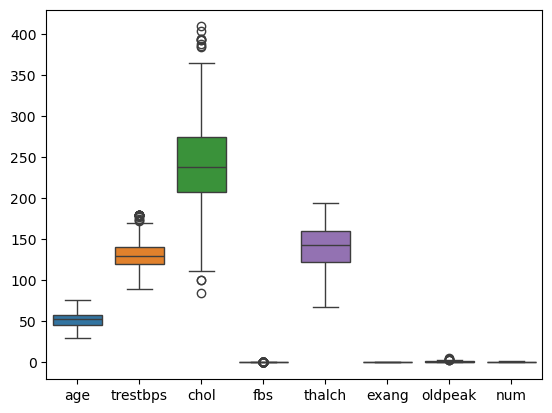

In [19]:
import seaborn as sns
sns.boxplot(out_data)

<Axes: ylabel='chol'>

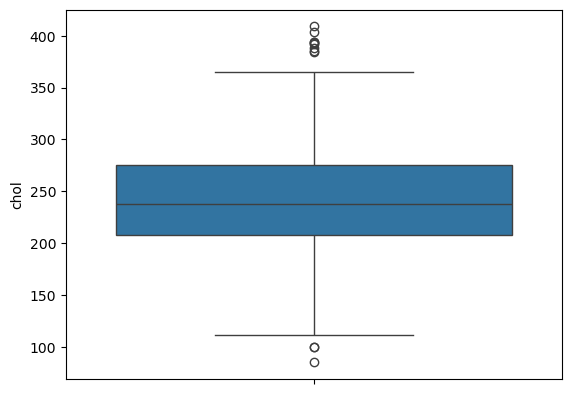

In [20]:
sns.boxplot(out_data['chol'])

In [21]:
Q1 = out_data['chol'].quantile(0.25)
Q3 = out_data['chol'].quantile(0.75)
IQR = Q3 - Q1
Upper_limit = Q3 + (IQR * 1.5)
Lower_limit = Q1 - (IQR * 1.5)
x1 =out_data[(out_data['chol'] <= Lower_limit) & (out_data['chol'] >= Upper_limit)]
x1

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num


<Axes: ylabel='Count'>

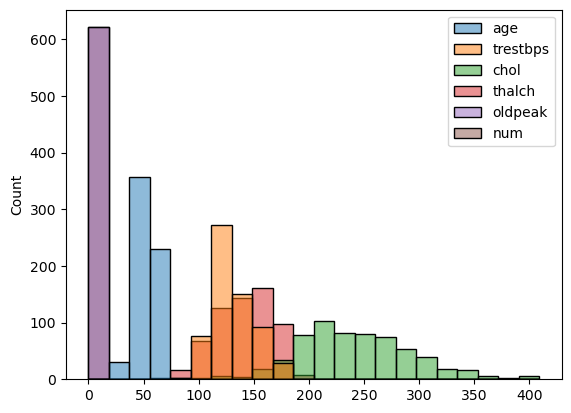

In [22]:
numerical_columns = out_data.select_dtypes(include = ['int64','float64'])
sns.histplot(numerical_columns)


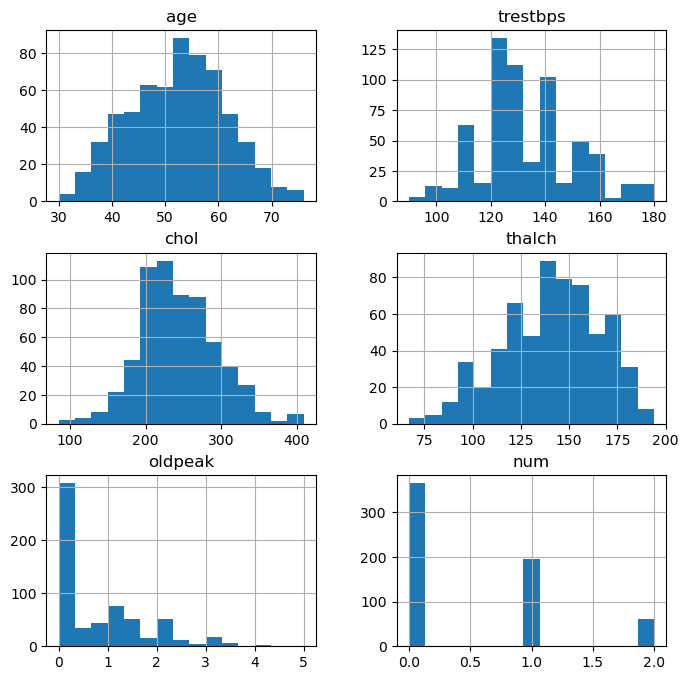

In [23]:
import matplotlib.pyplot as plt
numerical_columns.hist(bins = 15 , figsize = (8,8))
plt.show()

<Axes: >

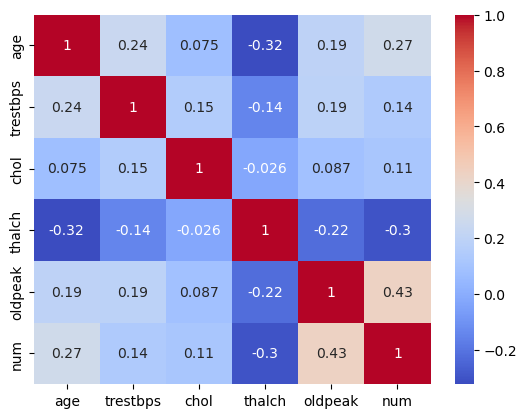

In [24]:
correlation_matrix = numerical_columns.corr()
sns.heatmap(correlation_matrix , cmap = 'coolwarm' ,annot = True)

<Axes: xlabel='oldpeak', ylabel='num'>

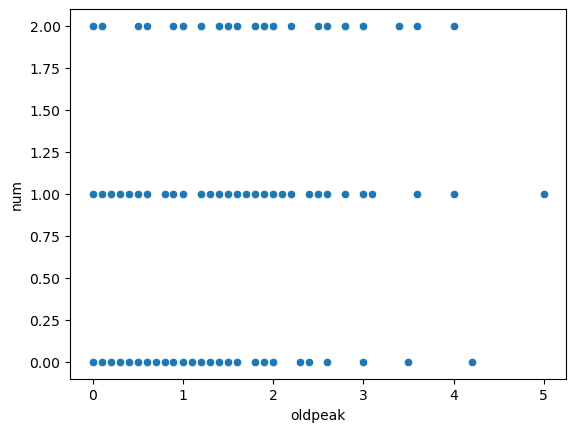

In [25]:
sns.scatterplot(numerical_columns ,x = 'oldpeak' , y = 'num')

## there is no correlation between the features

In [26]:
out_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.300000,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.000000,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.400000,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.000000,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.500000,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,72,Male,asymptomatic,160,213,True,lv hypertrophy,130,False,1.500000,upsloping,normal,2
764,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.000000,downsloping,normal,2
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.000000,downsloping,normal,2
767,58,Male,non-anginal,158,232,False,st-t abnormality,138,True,0.891253,downsloping,normal,2


In [27]:
out_data['cp'].unique()

array(['typical angina', 'atypical angina', 'asymptomatic', 'non-anginal'],
      dtype=object)

In [28]:
out_data['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [29]:
out_data['slope'].unique()

array(['downsloping', 'flat', 'upsloping'], dtype=object)

In [30]:
out_data['thal'].unique()

array(['fixed defect', 'normal', 'reversable defect'], dtype=object)

## Scaling the data

## 3. Feature Engineering:

If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

In [31]:
out_data = pd.get_dummies(out_data, columns = ['sex' ,'cp', 'fbs' , 'restecg' , 'exang' , 'slope' , 'thal'])
out_data

,age,trestbps,chol,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,150,2.300000,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
1,41,135,203,132,0.000000,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
2,57,140,192,148,0.400000,0,0,1,1,0,...,1,0,1,0,0,1,0,1,0,0
3,52,118,186,190,0.000000,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
4,57,110,201,126,1.500000,0,0,1,1,0,...,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,72,160,213,130,1.500000,2,0,1,1,0,...,0,0,1,0,0,0,1,0,1,0
764,58,150,219,118,0.000000,2,0,1,0,0,...,0,1,0,1,1,0,0,0,1,0
765,58,150,219,118,0.000000,2,0,1,0,0,...,0,1,0,1,1,0,0,0,1,0
767,58,158,232,138,0.891253,2,0,1,0,0,...,0,1,0,1,1,0,0,0,1,0


In [32]:
out_data.replace({True:1,False :0}, inplace = True)
out_data

,age,trestbps,chol,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,150,2.300000,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
1,41,135,203,132,0.000000,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
2,57,140,192,148,0.400000,0,0,1,1,0,...,1,0,1,0,0,1,0,1,0,0
3,52,118,186,190,0.000000,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
4,57,110,201,126,1.500000,0,0,1,1,0,...,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,72,160,213,130,1.500000,2,0,1,1,0,...,0,0,1,0,0,0,1,0,1,0
764,58,150,219,118,0.000000,2,0,1,0,0,...,0,1,0,1,1,0,0,0,1,0
765,58,150,219,118,0.000000,2,0,1,0,0,...,0,1,0,1,1,0,0,0,1,0
767,58,158,232,138,0.891253,2,0,1,0,0,...,0,1,0,1,1,0,0,0,1,0


In [33]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.300000,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.000000,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.400000,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.000000,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.500000,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.500000,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.000000,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.500000,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,True,0.891253,downsloping,fixed defect,4


In [34]:
data['num'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [35]:
out_data['num'].unique()

array([0, 1, 2], dtype=int64)

## 4. Decision Tree Classification:

Split the dataset into training and testing sets (e.g., using an 80-20 split).
Implement a Decision Tree Classification model using a library like scikit-learn.
Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

In [36]:
x = out_data.iloc[:,:5]
y = out_data['num']

In [37]:
x

,age,trestbps,chol,thalch,oldpeak
0,63,145,233,150,2.300000
1,41,135,203,132,0.000000
2,57,140,192,148,0.400000
3,52,118,186,190,0.000000
4,57,110,201,126,1.500000
...,...,...,...,...,...
762,72,160,213,130,1.500000
764,58,150,219,118,0.000000
765,58,150,219,118,0.000000
767,58,158,232,138,0.891253


In [38]:
y

0      0
1      0
2      0
3      0
4      0
      ..
762    2
764    2
765    2
767    2
772    2
Name: num, Length: 621, dtype: int64

In [39]:
y.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
y.value_counts()

0    365
1    196
2     60
Name: num, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [43]:
model = DecisionTreeClassifier(criterion = 'gini' , max_depth = 2)
model.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=2)

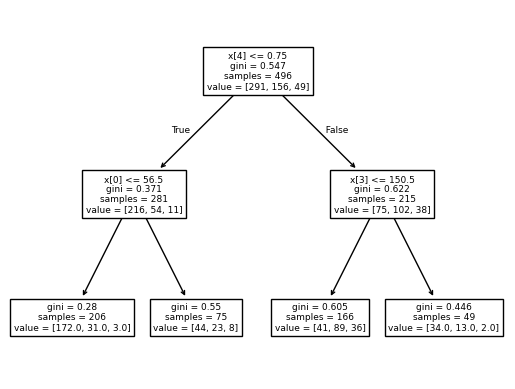

In [44]:
tree.plot_tree(model);

In [45]:
x.columns

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak'], dtype='object')

In [46]:
import matplotlib.pyplot as plt

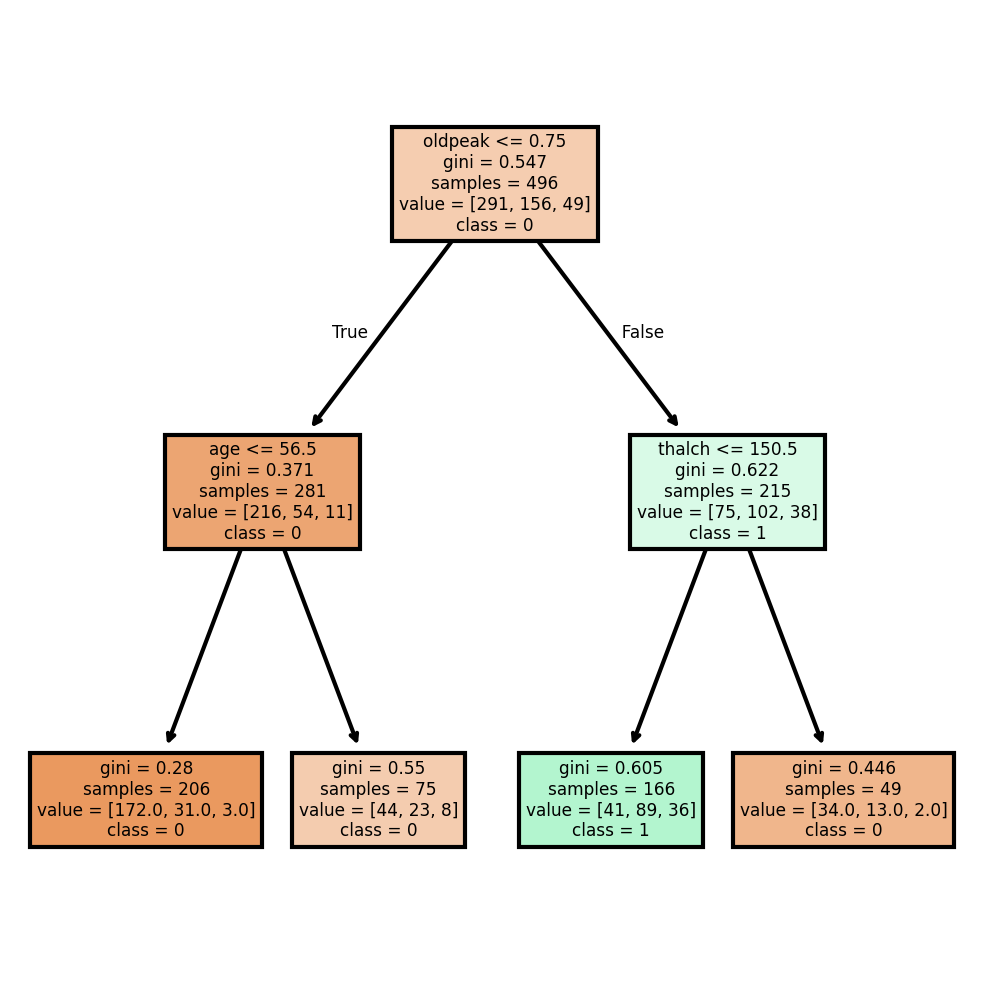

In [47]:
fn =['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
cn = ['0','1','2','3','4']

fig,axes = plt.subplots(nrows = 1 ,ncols =1 ,figsize = (4,4) , dpi = 300)

tree.plot_tree(model,
               feature_names = fn,
               class_names = cn,
               filled = True);

In [48]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve,roc_auc_score,auc

In [50]:
acc_score = accuracy_score(y_test,y_pred)
print('accuracy_score:',acc_score)

prec_score = precision_score(y_test,y_pred,average = 'micro')
print('precision_score:',prec_score)

reca_score = recall_score(y_test,y_pred,average = 'micro')
print('recall_score:',reca_score)

f1score = f1_score(y_test,y_pred,average = 'micro')
print('f1_score:',f1score)

accuracy_score: 0.672
precision_score: 0.672
recall_score: 0.672
f1_score: 0.672


In [51]:
y_test.value_counts(), len(y_pred)

(0    74
 1    40
 2    11
 Name: num, dtype: int64,
 125)

## multi class is not supported in decision tree(target = 1,2,3 classes)

## hyperparameter tuning

## 5. Hyperparameter Tuning:
Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion

In [52]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [53]:
model1 = DecisionTreeClassifier()
params = [{'criterion' : ['entropy','zini'],
           'max_depth' : [2,3,4,5,6,7],
           'min_samples_split' : [2,4,6,10,20]
           }]
gsv = GridSearchCV(model1,params)
gsv.fit(x,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['entropy', 'zini'],
                          'max_depth': [2, 3, 4, 5, 6, 7],
                          'min_samples_split': [2, 4, 6, 10, 20]}])

In [54]:
gsv.best_params_,gsv.best_score_

({'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2},
 0.6169935483870967)

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[57, 17,  0],
       [13, 27,  0],
       [ 6,  5,  0]], dtype=int64)

In [ ]:
#model after hyperparameter tuning

In [56]:
model2 = DecisionTreeClassifier(criterion='entropy',max_depth = 2 , min_samples_split= 2)
model2.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [57]:
y_pred_ = model2.predict(x_test)

In [58]:
acc_score = accuracy_score(y_test,y_pred_)
print('accuracy_score:',acc_score)

prec_score = precision_score(y_test,y_pred_,average = 'micro')
print('precision_score:',prec_score)

reca_score = recall_score(y_test,y_pred_,average = 'micro')
print('recall_score:',reca_score)

f1score = f1_score(y_test,y_pred_,average = 'micro')
print('f1_score:',f1score)

accuracy_score: 0.624
precision_score: 0.624
recall_score: 0.624
f1_score: 0.624


<Axes: >

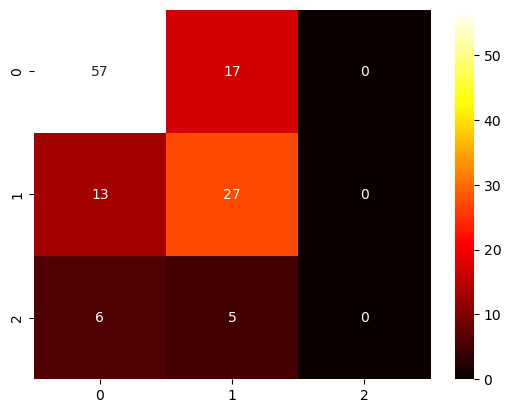

In [59]:
import seaborn as sns
sns.heatmap(cm,annot = True , cmap = 'hot')